# Linear Regression in C++ and Python

Add equations ...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
from scipy import stats

sns.set_style("darkgrid")

%matplotlib inline

In [2]:
# In order to see the C++ program results inside the notebook run make
!make

g++ -I. -o results.out main.o linreg.o


In [3]:
# C++ results, created by executing Makefile 
!./results.out

Intercept = 6.19489
Slope = 0.943159
Chi2 = 6918.97
x_mean = 39.5
x_std = 17.3181
y_mean = 43.4497
y_std = 19.5475
R-squared = 0.698209
r-value = 0.835589


In [12]:
path = !pwd
data = pd.read_csv('%s/data.txt' % path[0], header = None)

In [32]:
x = data.iloc[:,0].values
x = sm.add_constant(x)   # Add intercept for linear regression
y = data.iloc[:,1].values

model = sm.OLS(y, x)
results = model.fit()

print('Intercept: ', results.params[0])
print('Slope: ', results.params[1])

df = pd.DataFrame({'x': x[:, 1], 'y': y})    # Ignore the added constant for intercept
print(results.summary())

# ==========================================================================================================================


Intercept:  6.194880421783818
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     134.2
Date:                Thu, 03 Oct 2019   Prob (F-statistic):           1.01e-16
Time:                        12:08:59   Log-Likelihood:                -227.57
No. Observations:                  60   AIC:                             459.1
Df Residuals:                      58   BIC:                             463.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1949 

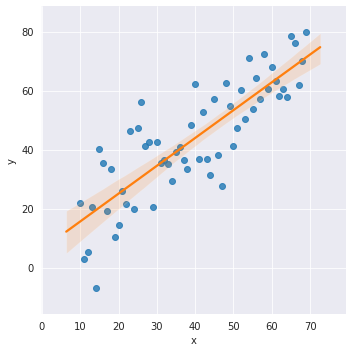

In [28]:
# Plot using seaborn
sns.lmplot('x', 'y', data = df, ci = 95, height = 5, aspect = 1.0, line_kws = {'color': 'C1'})
plt.margins(0.1);

In [33]:
# Based on the equations

sigma = np.ones(x[:, 1].size)
S = sum(1/sigma**2)
Sx = sum(x[:, 1]/sigma**2)
Sy = sum(y/sigma**2)
Sx2 = sum(x[:, 1]**2 / sigma**2)
Sxy = sum(y * x[:, 1]/sigma**2)

a1 = (Sy * Sx2 - Sx * Sxy)/(S*Sx2 - (Sx)**2)
a2 = (S * Sxy - Sx * Sy)/(S*Sx2 - (Sx)**2)

print('Intercept: ', a1)
print('Slope: ', a2)


Intercept:  6.194880421783865
Slope:  0.9431588627396496
